<a href="https://colab.research.google.com/github/Mikhal21/google-or-tools-java/blob/master/Copy_of_IntroAuML_C0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preambule

Run this code to import modules and define some functions that may result useful

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import MT19937, RandomState, SeedSequence
from collections import Counter
import sklearn


In [3]:
# Functions to simplify plotting

def hard_split(z_orig, threshold = 0.0, eps = 1e-5):
    ''' Turns a decision functions or score into hard labels
    '''
    z = z_orig.copy()
    z[z>threshold+eps] = 1
    z[z<threshold-eps] = -1
    return z

def getXYRange2D(X):
    ''' Return the limits for a 2d scatter plot of points
            X is of shape n x 2 where n is the number of points
            returns xmin, xmax, ymin, ymax
    '''
    return min(X[:,0]), max(X[:,0]),min(X[:,1]), max(X[:,1])

# Example with linear models for regression

1. Use `sklearn` [linear model](https://scikit-learn.org/stable/modules/linear_model.html) to estimate a linear model using least squares and the folowing data

<center>

| x | y   |
|---|-----|
| 1 | 1   |
| 9 | 9.5 |
| 9 | 2.5 |

</center>

2. Plot the data and the obtained linear function






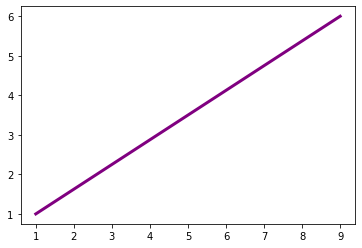

In [4]:
X = np.array([[1],
              [9],
              [9]
              ])
Y = np.array([1,
              9.5,
              2.5])

# Create and fit the model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,Y)



# Plot
Y_pred = reg.predict(X)
plt.plot(X, Y_pred, color="purple", linewidth=3)

Now let us try another interesting situation. On the last example we had two points with the same $x$ component and different $y$ component and the resulting linear function passed on the middle of the two $y$.

Now imagine we have many points clustered around one of the two original points. What happens to the resulting model?

3. Repeat the last example but instead of ony 3 points, add a few points around on the two points that had the same $x$ coordinate

In [ ]:
X = np.array([[1],
              [9],
              [9]
              ])
Y = np.array([1,
              9.5,
              2.5])

# Add the new points to our dataset
""" Your code here """

# Fit model
""" Your code here """

# Plot
""" Your code here """

Having seen the behaviour of the estimated linear model with the new points, what can you say about the linear model learned using least squares?


**BONUS**: We could state the least squares problem but minimizing a different function that measures the error between observations and predictions. What happens if instead of the squared error $(\hat{y} - y)^2$ we use the absolute error $| \hat{y} - y |$? 

# ESL Section 2.3 example

In this example we are going to try to classify some synthetic data using a linear model and a k-nearest neighbors model.

We want to:

- Get a first impression on the effect of the parameter $k$ in the resulting classifier looking at the decision function.
- Relate the effect of the parameter $k$ to the concepts of over and under fitting
- Evaluate the capacity of a simple linear model in the classification setting


## Generate data

Authors created data by first setting 10 points for each class following distributions $\mathcal{N}((1,0), \mathbb{I})$ and $\mathcal{N}((1,0), \mathbb{I})$. Then each other point is generated as follows:

For each class, do 100 times the following:

- Choose uniformly at random one of the 10 base points $m_k$ of the given class
- Sample a point from the distribution $\mathcal{N}(m_k, \mathbb{I}/5)$



Generate the data and plot it

In [ ]:
def generate_example_data(N = 100, seed = 111):

    # Set seed
    rs = RandomState(MT19937(SeedSequence(seed)))

    """ Your code here """

    return X, Y

# Plot data colored by class
""" Your code here """

## Linear model using least squares

Learn a linear model trying to fit the labels as if they were continous. To turn the regression model into a classifier we will use the following decision rule to predict a class $\hat{y} \in \lbrace 0, 1 \rbrace$:

$$\hat{y} = 1  \text{ if } f(x) \gt 0.5 \text{, } 0 \text{ otherwise.}$$


Plot the data and the resulting classifier. 

*Hint: You can have a look at the functions [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) and [contourf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) of `matplotlib` to get a nice plot.*

In [ ]:
# Define and fit model
""" Your code here """

# Plot
""" Your code here """

## Nearest neighbors

Create a nearest neighbors classifier and plot the decision regions

In [ ]:
# Define and fit model
""" Your code here """

# Plot
""" Your code here """

Now that we can train and evaluate a nearest neighbors model we are going to see how the train and test error behaves with respect to $k$

1. Plot the accuracy on the training set of the model with respect to the parameter $k$
2. Plot now the accuracy on a test set (new data produced using the same data generation process)
3. Plot also the accuracy of the linear classifier to compare it with the KNN

In [ ]:
# Go over the different values of k
# For each k, fit the model and compute the accuracy 
# on both train and test set
# Save the results to plot them after

""" Your code here """

# Plot
""" Your code here """

What can you say about the performance of the linear classifier and the KNN classifier for this particular data distribution?




Now let us change the data generation process and repeat the last steps with simply two classes produced by two multivariate normals $\mathcal{N}((1,0), \mathbb{I}/5)$ and $\mathcal{N}((1,0), \mathbb{I}/5)$.

Train the linear classifier and the KNN, and repeat the plot from the previous step

In [ ]:
def generate_blobs(N = 100, seed = 111):
    # Set seed
    rs = RandomState(MT19937(SeedSequence(seed)))
    """ Your code here """
    return X, Y


# Data
X, Y = generate_blobs(100)

# Linear classifier (Define and fit)
""" Your code here """


# KNN 
# Define and repeat the fit and evaluation going over the different values of k
""" Your code here """

# Plot
""" Your code here """

Lastly, repeat the same plot you already did of the data and the KNN decision function but with the new dataset

In [ ]:
""" Your code here """

# Overfitting and underfitting

To see the effect of under and overfitting we are going to create data using a degree 5 polynomial and adding some noise to the samples.

We are going to estimate a linear model using polynomials of degree 1 to 10. In each case we are going to measure the error on the training and test set 

1. Generate random data using an Uniform distribution in the interval $(-2, 2)$. Remember to create a train and test set
2. Define the real $\beta$ (coefficients of the polynomial)
3. Fit a model with degree 10
4. Plot the original data and the predictions made the degree 10 model

In [ ]:
# Generate data (X, Y)
rs = RandomState(MT19937(SeedSequence(2111)))
""" Your code here """

# Fit polynomial
# Use a linear model over an augmented X
# This means to consider nor only X but all the powers of X
# For each observation x we are going to consider the variables
# 1, x, x², x³, x⁴ .... 
""" Your code here """

# Plot
""" Your code here """

## Now test the model using new data.

1. Plot the [mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) on the train and test set as a function of the degree.

In [ ]:
# Generate test data
""" Your code here """

# Fit polynomial for each degree and save the MSE for plotting later
MSEs_train = []
MSEs_test = []
degrees = range(1, 10)
""" Your code here """


# Plot
""" Your code here """

1. What do you observe? What degree would you choose for the final model?

2. Plot the original points and the polynomials obtained using a model with degree 1, 5 and 10

*Hint: If the axis limits are getting to large, set them manually*

In [ ]:
""" Your code here """